## IMDB 예제

In [1]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [2]:
max_features=10000
maxlen = 20

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [4]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [6]:
x_train[0]

array([  65,   16,   38, 1334,   88,   12,   16,  283,    5,   16, 4472,
        113,  103,   32,   15,   16, 5345,   19,  178,   32])

In [7]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

In [8]:
model = Sequential()
model.add(Embedding(max_features+1, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80008     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,169
Trainable params: 80,169
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

C:\Users\siras\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 104us/step - loss: 0.6749 - acc: 0.6113 - val_loss: 0.6332 - val_acc: 0.6990
Epoch 2/10
20000/20000 [==============================] - 2s 85us/step - loss: 0.5569 - acc: 0.7477 - val_loss: 0.5372 - val_acc: 0.7258
Epoch 3/10
20000/20000 [==============================] - 2s 86us/step - loss: 0.4704 - acc: 0.7862 - val_loss: 0.5038 - val_acc: 0.7454
Epoch 4/10
20000/20000 [==============================] - 2s 86us/step - loss: 0.4251 - acc: 0.8096 - val_loss: 0.4931 - val_acc: 0.7558
Epoch 5/10
20000/20000 [==============================] - 2s 85us/step - loss: 0.3937 - acc: 0.8270 - val_loss: 0.4916 - val_acc: 0.7564
Epoch 6/10
20000/20000 [==============================] - 2s 88us/step - loss: 0.3684 - acc: 0.8400 - val_loss: 0.4927 - val_acc: 0.7580
Epoch 7/10
20000/20000 [==============================] - 2s 87us/step - loss: 0.3460 - acc: 0.8533 - val_loss: 0.4978 - val_acc

# Umich-SI650 감성분석 예제

In [10]:
ftrain = open('data/umich-sentiment-train.txt', 'rb')
labels = []
texts = []
for line in ftrain:
    label, sentence = line.decode('utf8').strip().split('\t')
    labels.append(int(label))
    texts.append(sentence)

In [11]:
texts

['The Da Vinci Code book is just awesome.',
 "this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this.",
 'i liked the Da Vinci Code a lot.',
 'i liked the Da Vinci Code a lot.',
 "I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.",
 "that's not even an exaggeration ) and at midnight we went to Wal-Mart to buy the Da Vinci Code, which is amazing of course.",
 'I loved the Da Vinci Code, but now I want something better and different!..',
 'i thought da vinci code was great, same with kite runner.',
 'The Da Vinci Code is actually a good movie...',
 'I thought the Da Vinci Code was a pretty good book.',
 'The Da Vinci Code is one of the most beautiful movies ive ever seen.',
 'The Da Vinci Code is an * amazing * book, do not get me wrong.',
 'then I turn on the light and the radio and enjoy my Da Vinci Code.',
 'The Da Vinci Code was REALLY good.',
 'i love da vinci code....',
 'i loved da vinci co

In [12]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

In [13]:
max_words = 2000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
seq = tokenizer.texts_to_sequences(texts)

In [14]:
seq

[[2, 7, 6, 8, 88, 12, 40, 15],
 [56,
  14,
  2,
  102,
  952,
  953,
  340,
  120,
  97,
  37,
  303,
  301,
  18,
  954,
  3,
  7,
  6,
  8,
  121,
  104,
  955,
  327,
  56],
 [1, 108, 2, 7, 6, 8, 13, 309],
 [1, 108, 2, 7, 6, 8, 13, 309],
 [1, 108, 2, 7, 6, 8, 37, 21, 956, 367, 957, 19, 627, 71, 467],
 [398,
  60,
  303,
  54,
  958,
  3,
  98,
  959,
  55,
  96,
  19,
  960,
  961,
  19,
  628,
  2,
  7,
  6,
  8,
  51,
  12,
  321,
  31,
  378],
 [1, 48, 2, 7, 6, 8, 37, 310, 1, 49, 379, 122, 3, 468],
 [1, 106, 7, 6, 8, 14, 126, 145, 39, 962, 963],
 [2, 7, 6, 8, 12, 328, 13, 92, 20],
 [1, 106, 2, 7, 6, 8, 14, 13, 298, 92, 88],
 [2, 7, 6, 8, 12, 41, 31, 2, 107, 91, 33, 629, 120, 127],
 [2, 7, 6, 8, 12, 54, 321, 88, 322, 60, 311, 57, 380],
 [99, 1, 630, 95, 2, 964, 3, 2, 965, 3, 354, 29, 7, 6, 8],
 [2, 7, 6, 8, 14, 32, 92],
 [1, 11, 7, 6, 8],
 [1, 48, 7, 6, 8],
 [19, 355, 2, 7, 6, 8, 3, 13, 91, 966],
 [2, 7, 6, 8, 12, 54, 15, 88],
 [333, 12, 1, 368, 2, 7, 6, 8],
 [314, 7, 6, 8, 967, 3

In [15]:
word2idx = tokenizer.word_index
idx2word = {j:i for i, j in word2idx.items()}

In [16]:
word2idx

{'i': 1,
 'the': 2,
 'and': 3,
 'potter': 4,
 'harry': 5,
 'vinci': 6,
 'da': 7,
 'code': 8,
 'brokeback': 9,
 'mountain': 10,
 'love': 11,
 'is': 12,
 'a': 13,
 'was': 14,
 'awesome': 15,
 'mission': 16,
 'impossible': 17,
 'like': 18,
 'to': 19,
 'movie': 20,
 'it': 21,
 'that': 22,
 'because': 23,
 'sucks': 24,
 'sucked': 25,
 'hate': 26,
 'so': 27,
 'as': 28,
 'my': 29,
 'much': 30,
 'of': 31,
 'really': 32,
 'movies': 33,
 'stupid': 34,
 'you': 35,
 'down': 36,
 'but': 37,
 'be': 38,
 'with': 39,
 'just': 40,
 'one': 41,
 'know': 42,
 'suck': 43,
 '3': 44,
 'out': 45,
 'or': 46,
 'am': 47,
 'loved': 48,
 'want': 49,
 'into': 50,
 'which': 51,
 'right': 52,
 'for': 53,
 'an': 54,
 'we': 55,
 'this': 56,
 'me': 57,
 'are': 58,
 'think': 59,
 'not': 60,
 'how': 61,
 'if': 62,
 'depressing': 63,
 'people': 64,
 'who': 65,
 '2': 66,
 'his': 67,
 'would': 68,
 'reading': 69,
 'horrible': 70,
 "it's": 71,
 'up': 72,
 'why': 73,
 'series': 74,
 'in': 75,
 'only': 76,
 'fucking': 77,
 'ter

In [17]:
maxlen=40
data = pad_sequences(seq, maxlen=maxlen)

In [18]:
data

array([[  0,   0,   0, ...,  12,  40,  15],
       [  0,   0,   0, ..., 955, 327,  56],
       [  0,   0,   0, ...,   8,  13, 309],
       ...,
       [  0,   0,   0, ...,  20,   9,  10],
       [  0,   0,   0, ...,  13,  70,  20],
       [  0,   0,   0, ...,  13,  78,  20]])

In [19]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = np.asarray(labels)
labels = labels[indices]

In [20]:
embedding_idx = {}
f = open('data/glove.6b.50d.txt', encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embedding_idx[word] = coefs
f.close()

In [21]:
embed_dim = 50

embed_matrix = np.zeros((max_words, embed_dim))
for word, i in word2idx.items():
    if i < max_words:
        embed_vector = embedding_idx.get(word)
        if embed_vector is not None:
            embed_matrix[i] = embed_vector

In [22]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embed_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 40, 50)            100000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                64032     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 164,065
Trainable params: 164,065
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.layers[0].set_weights([embed_matrix])
model.layers[0].trainable=False
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 40, 50)            100000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                64032     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 164,065
Trainable params: 64,065
Non-trainable params: 100,000
_________________________________________________________________


In [24]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(data, labels, epochs=10, batch_size=32, validation_split=0.2)

Train on 5668 samples, validate on 1418 samples
Epoch 1/10
5668/5668 [==============================] - 1s 104us/step - loss: 0.2141 - acc: 0.9231 - val_loss: 0.1317 - val_acc: 0.9485
Epoch 2/10
5668/5668 [==============================] - 1s 89us/step - loss: 0.0770 - acc: 0.9716 - val_loss: 0.1012 - val_acc: 0.9542
Epoch 3/10
5668/5668 [==============================] - 0s 88us/step - loss: 0.0414 - acc: 0.9862 - val_loss: 0.0965 - val_acc: 0.9605
Epoch 4/10
5668/5668 [==============================] - 0s 86us/step - loss: 0.0236 - acc: 0.9917 - val_loss: 0.1108 - val_acc: 0.9626
Epoch 5/10
5668/5668 [==============================] - 0s 86us/step - loss: 0.0137 - acc: 0.9963 - val_loss: 0.1191 - val_acc: 0.9612
Epoch 6/10
5668/5668 [==============================] - 1s 90us/step - loss: 0.0082 - acc: 0.9988 - val_loss: 0.1321 - val_acc: 0.9654
Epoch 7/10
5668/5668 [==============================] - 0s 84us/step - loss: 0.0052 - acc: 0.9991 - val_loss: 0.1232 - val_acc: 0.9690
Epoch 

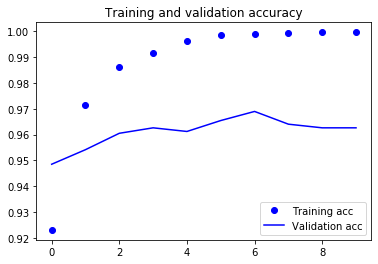

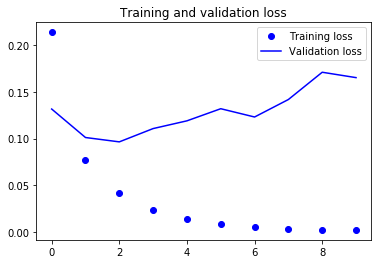

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()